# CS381 Data Analytics Final Project

### Due on 5/13/2020 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [5]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


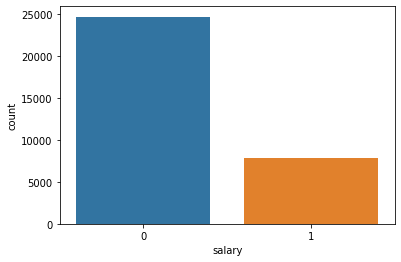

In [6]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

### Exploratory Data Analysis

In [7]:
print(df.shape)
df = df.replace('?', np.nan)
df.isnull().any()

(32571, 15)


age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

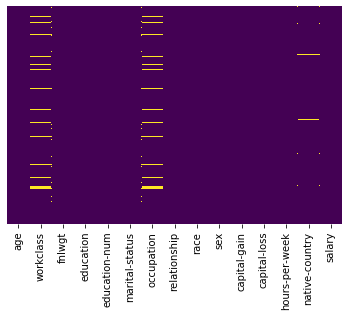

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.dropna(inplace=True)

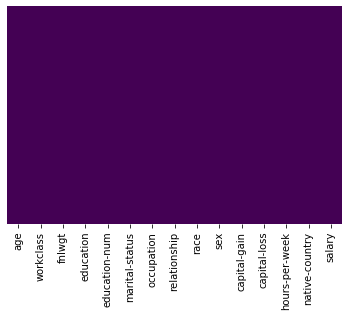

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

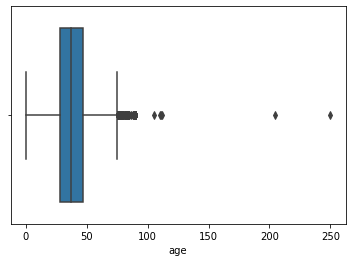

In [12]:
sns.boxplot(df["age"])

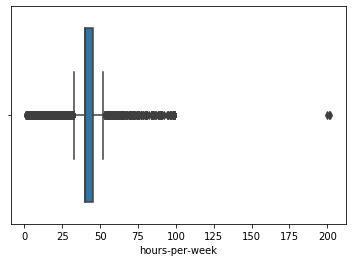

In [13]:
sns.boxplot(df['hours-per-week'])

In [14]:
df = remove_outlier(df, 'age')
df = remove_outlier(df, 'hours-per-week')

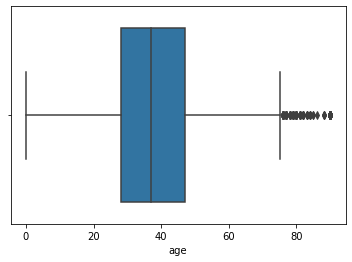

In [15]:
sns.boxplot(df["age"])

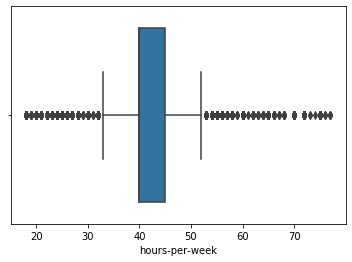

In [16]:
sns.boxplot(df['hours-per-week'])

### Basic Exploration of Relationship, with plots and graphs

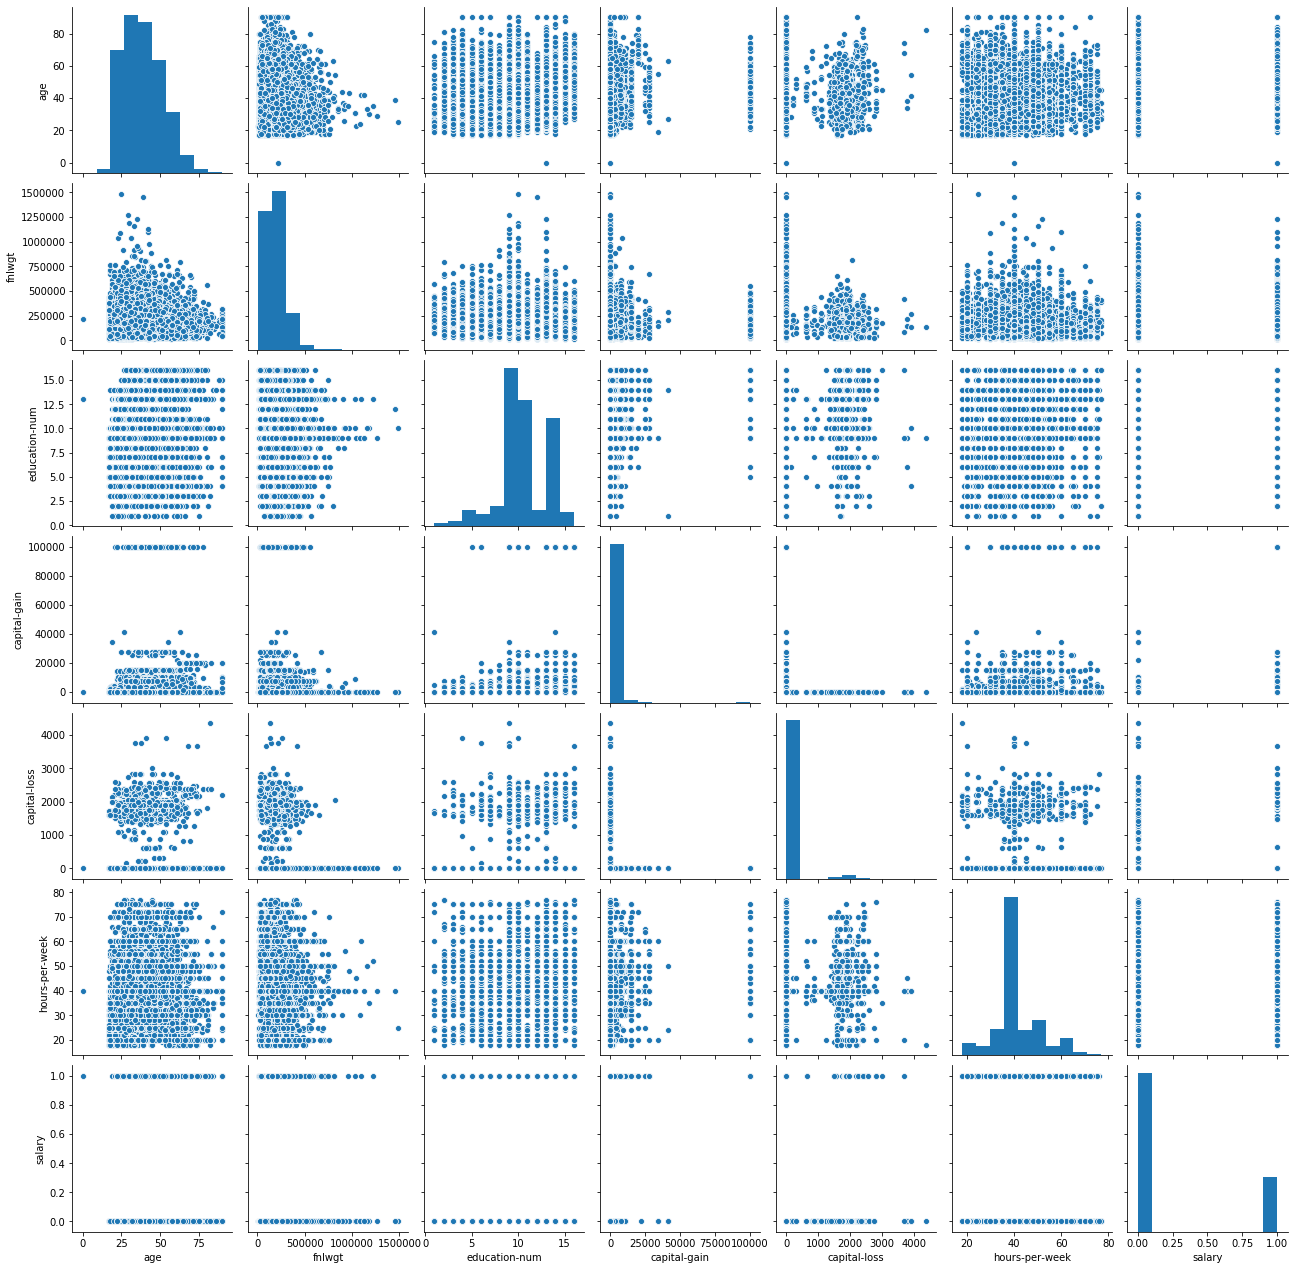

In [17]:
sns.pairplot(df)

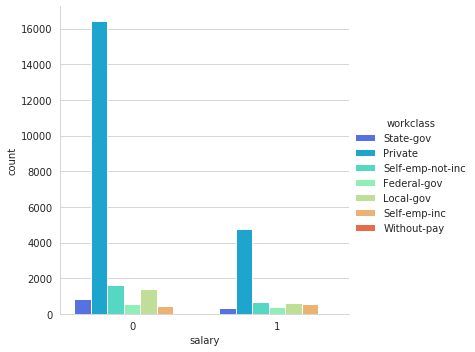

In [18]:
sns.set_style('whitegrid')
sns.factorplot('salary', kind='count', hue='workclass', data=df,palette='rainbow')

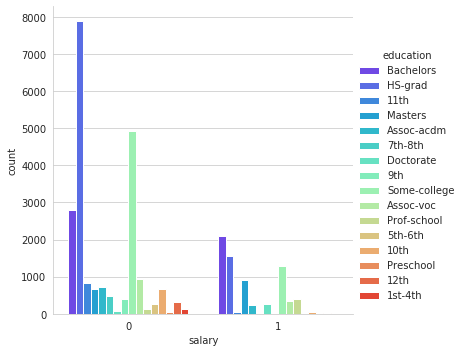

In [19]:
sns.factorplot('salary', kind='count', hue='education', data=df,palette='rainbow')

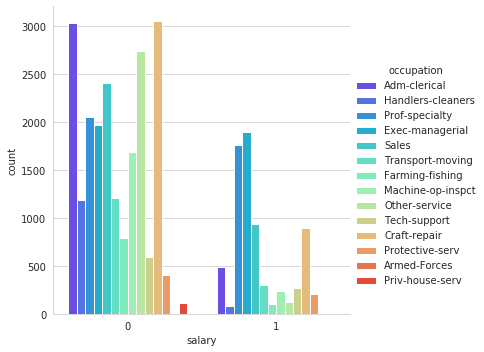

In [20]:
sns.factorplot('salary', kind='count', hue='occupation', data=df,palette='rainbow')

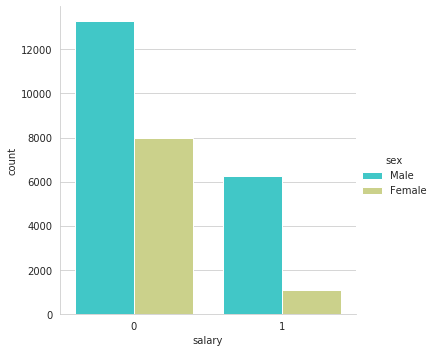

In [21]:
sns.factorplot('salary', kind='count', hue='sex', data=df,palette='rainbow')

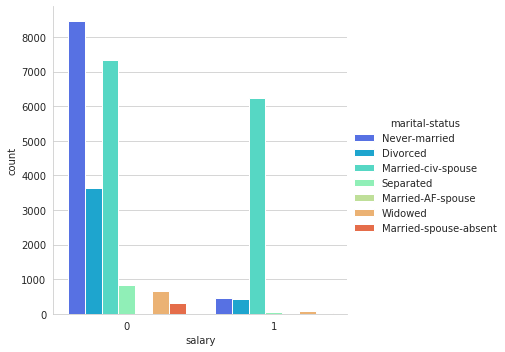

In [22]:
sns.factorplot('salary', kind='count', hue='marital-status', data=df,palette='rainbow')

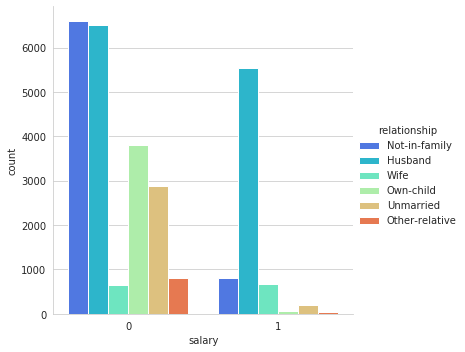

In [23]:
sns.factorplot('salary', kind='count', hue='relationship', data=df,palette='rainbow')

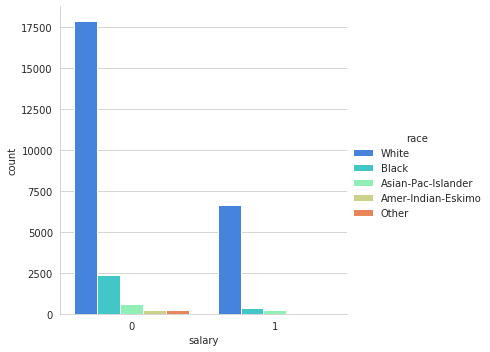

In [24]:
sns.factorplot('salary', kind='count', hue='race', data=df,palette='rainbow')

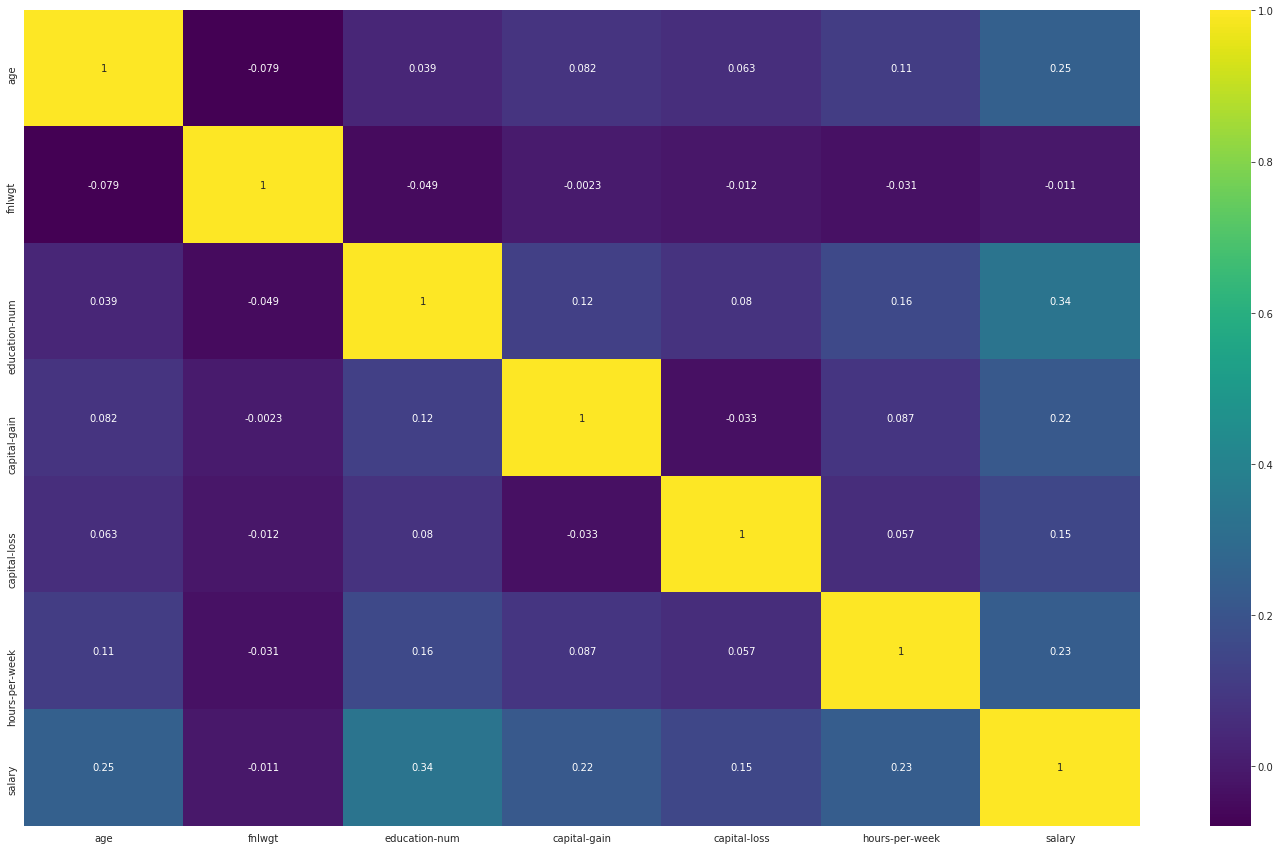

In [25]:
colormap = plt.cm.viridis
corr = df.corr()
f,ax=plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, ax=ax, cmap=colormap)
plt.show()

In [26]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,28583.000000,2.858300e+04,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000
mean,38.500542,1.902205e+05,10.151943,1119.484099,89.292901,41.684113,0.255956
std,12.723911,1.055124e+05,2.541952,7500.737654,406.379778,9.366452,0.436405
min,0.000000,1.376900e+04,1.000000,0.000000,0.000000,18.000000,0.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.789150e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.377290e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,77.000000,1.000000


### Converting Categorical Features

In [27]:
workclass = pd.get_dummies(df['workclass'],drop_first=True)
education = pd.get_dummies(df['education'],drop_first=True)
marital_status = pd.get_dummies(df['marital-status'],drop_first=True)
occupation = pd.get_dummies(df['occupation'],drop_first=True)
relationship = pd.get_dummies(df['relationship'],drop_first=True)
race = pd.get_dummies(df['race'],drop_first=True)
sex = pd.get_dummies(df['sex'],drop_first=True)
native_country = pd.get_dummies(df['native-country'],drop_first=True)

In [28]:
train_df = df[['age','fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']]
train_df = pd.concat([train_df, workclass, education, marital_status, occupation, relationship, race, sex, native_country], axis=1)
train_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,Local-gov,Private,Self-emp-inc,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Train Test Split

In [30]:
import random

X = train_df.drop('salary', axis=1)
y = train_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state = random.randint(1,1000))

### Model Evaluation

In [51]:
from sklearn import metrics
from sklearn.metrics import r2_score

def k_fold_cross_validation_and_R_Squared(model, k, X, y):
    accuracy_scores = []
    
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state = random.randint(1,1000))
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        
        accuracy_scores.append(accuracy_score(y_test, pred))
        
    return accuracy_scores

#### Logistic Regression

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

standarizer = StandardScaler()
log_model = LogisticRegression()

pipeline = make_pipeline(standarizer, log_model)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4281
           1       0.76      0.62      0.68      1436

    accuracy                           0.85      5717
   macro avg       0.82      0.78      0.79      5717
weighted avg       0.85      0.85      0.85      5717

0.8544691271645968


[[3997  284]
 [ 548  888]]


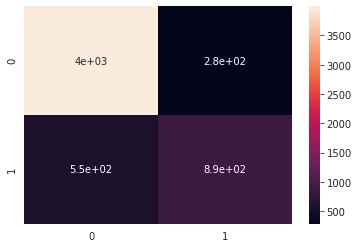

In [53]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

#### Logistic Regression Cross Validation

In [54]:
scores = k_fold_cross_validation_and_R_Squared(pipeline, 10, X, y)
scores

[0.8492216197306279,
 0.8390764386916215,
 0.8488717859016967,
 0.8341787650865838,
 0.845898198355781,
 0.8437991953821935,
 0.8425747769809341,
 0.852020290362078,
 0.8457232814413154,
 0.8436242784677278]

In [55]:
np.array(scores).mean()

0.8444988630400558

#### Decision Tree Classifier: Using Cross Validation to finding best Tree Depth

In [56]:
cv = KFold(n_splits=10)

accuracies = []
depth_range = range(1, 11)

for depth in depth_range:
    
    model = DecisionTreeClassifier(max_depth=depth)
    
    accuracy_scores = []
    
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                            random_state = random.randint(1,1000))
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        
        accuracy_scores.append(accuracy_score(y_test, pred))
        
    
    accuracies.append(np.array(accuracy_scores).mean())

dt = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dt = dt[["Max Depth", "Average Accuracy"]]
print(dt.to_string(index=False))
    

 Max Depth  Average Accuracy
         1          0.747245
         2          0.822739
         3          0.836225
         4          0.838517
         5          0.835613
         6          0.847385
         7          0.848295
         8          0.851635
         9          0.848434
        10          0.845251


In [57]:
best_depth = 0
best_score = accuracies[0]

for i in range(1, len(accuracies)):
    if best_score < accuracies[i]:
        best_score = accuracies[i]
        best_depth = i
        
best_depth += 1

In [58]:
model = DecisionTreeClassifier(max_depth=best_depth)

model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4259
           1       0.76      0.63      0.69      1458

    accuracy                           0.85      5717
   macro avg       0.82      0.78      0.80      5717
weighted avg       0.85      0.85      0.85      5717

0.8541192933356656


[[3971  288]
 [ 546  912]]


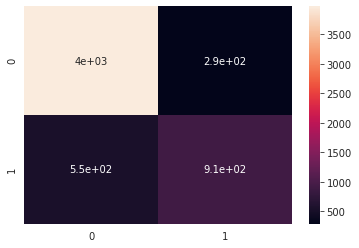

In [59]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

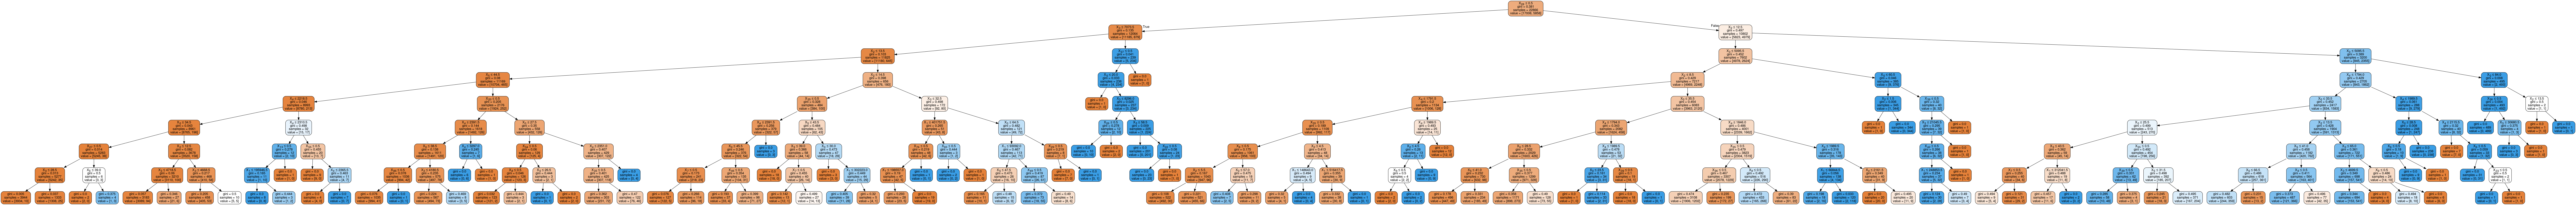

In [60]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Random Forest Classification

In [61]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [62]:
X = train_df.drop('salary', axis=1)
y = train_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = random.randint(1,1000))

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4231
           1       0.76      0.63      0.69      1486

    accuracy                           0.85      5717
   macro avg       0.82      0.78      0.79      5717
weighted avg       0.85      0.85      0.85      5717

0.8509707888752842


###### I tried three different model, LogisticRegression, DecisionTree, and RandomForest. Each of this model had almost similar Score. For LogisticRegression I applied Normalization to train data. Without Normalizing the score was around 77%. After Normalizing the Score almost goes upto 83%. 

###### For Decision Tree I applied 1 - 10 different depth, using brute-force search to find the best depth for the tree. 
